In [1]:
import torch
import pickle
from train import NanoGPT
model_save_path = f"/home/jan/projects/HARVARD/rl_basic_transformer/Cube/saved_models/model.pt"
# Load the saved model
with open(f"/home/jan/projects/HARVARD/rl_basic_transformer/Cube/saved_models/model_config.pkl", "rb") as f:
    model_config = pickle.load(f)
loaded_model = NanoGPT(
    model_config=model_config,
)
loaded_model.load_state_dict(torch.load(model_save_path))
loaded_model.eval() 

/tmp/ipykernel_426319/3543543573.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load(model_save_path))


NanoGPT(
  (gpt): ModularGPT(
    (hidden): Embedding(1, 96)
    (transformer): ModuleDict(
      (wte): Embedding(440, 96)
      (wpe): Embedding(13, 96)
      (rnn): RNN(
        (mlp): Sequential(
          (0): Linear(in_features=96, out_features=96, bias=True)
          (1): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
          (2): ReLU()
          (3): Linear(in_features=96, out_features=96, bias=True)
        )
        (c_attn0): Linear(in_features=96, out_features=192, bias=False)
        (q_attn0): Linear(in_features=96, out_features=96, bias=False)
        (c_proj): Linear(in_features=96, out_features=96, bias=False)
        (attn_dropout): Dropout(p=0.0, inplace=False)
        (resid_dropout): Dropout(p=0.0, inplace=False)
        (RNN): RNN(96, 96, batch_first=True)
      )
      (attn): CausalSelfAttention(
        (c_attn): Linear(in_features=96, out_features=288, bias=False)
        (attn_dropout): Dropout(p=0.0, inplace=False)
        (resid_dropout): Dropout(

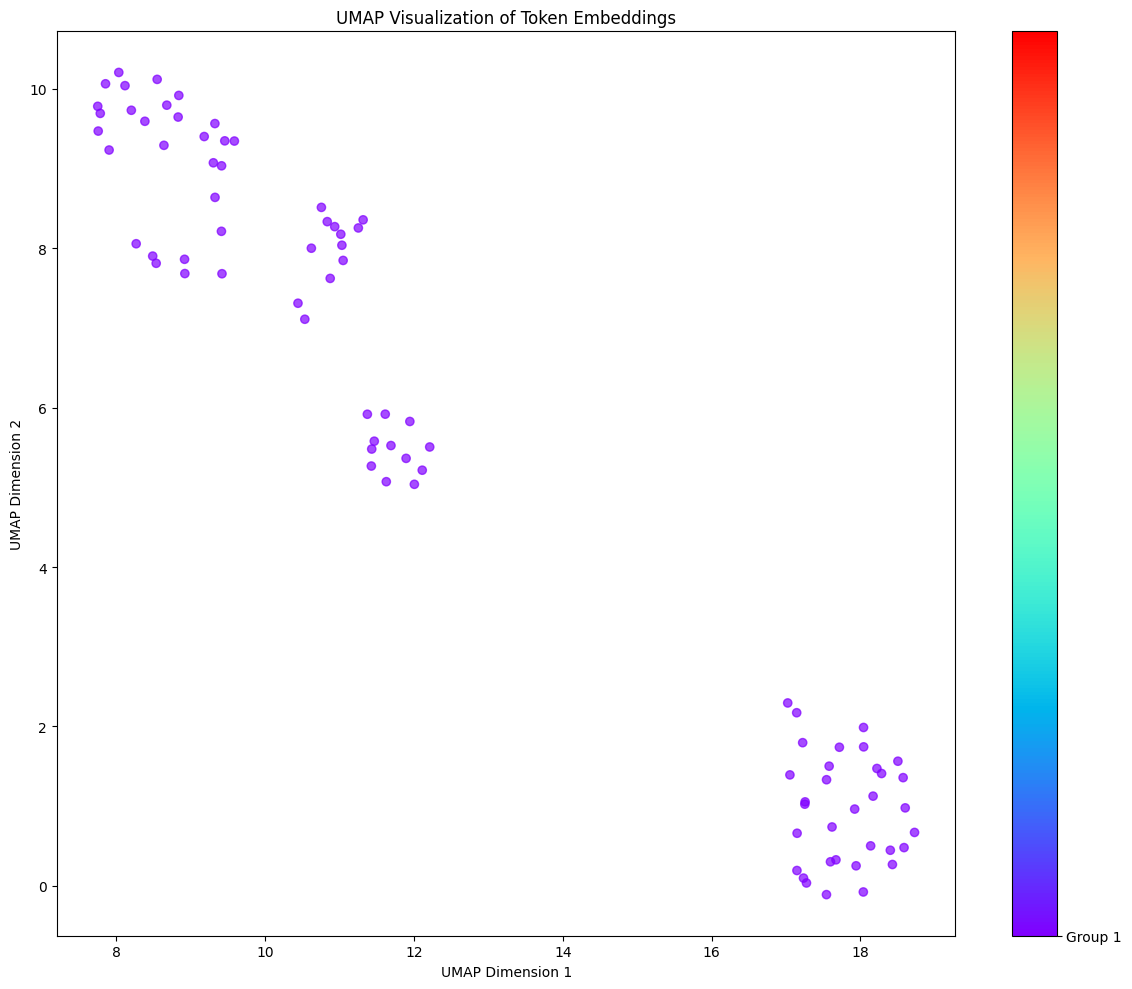

In [12]:
token_embedding = loaded_model.gpt.transformer.wte
i = 2
start_ix = i*85
end_ix = (i+1)*85       

tokens_to_visualize = token_embedding.weight[start_ix:end_ix]
import numpy as np
import matplotlib.pyplot as plt
from umap import UMAP

# Convert token embeddings to numpy array
embeddings = tokens_to_visualize.detach().cpu().numpy()

# Initialize UMAP
umap_model = UMAP(n_neighbors=15, n_components=2, min_dist=0.1, metric='cosine')

# Fit and transform the embeddings
umap_embeddings = umap_model.fit_transform(embeddings)
# Define colors for each group of 85 embeddings
num_groups = len(embeddings) // 85 + (1 if len(embeddings) % 85 != 0 else 0)
colors = plt.cm.rainbow(np.linspace(0, 1, num_groups))

# Create a color array for all embeddings
embedding_colors = np.zeros((len(embeddings), 4))
for i in range(num_groups):
    start_idx = i * 85
    end_idx = min((i + 1) * 85, len(embeddings))
    embedding_colors[start_idx:end_idx] = colors[i]

# Plot the UMAP visualization with colors
plt.figure(figsize=(12, 10))
scatter = plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], c=embedding_colors, alpha=0.7)
plt.title('UMAP Visualization of Token Embeddings')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')

# Add a colorbar legend
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.rainbow), ax=plt.gca())
cbar.set_ticks(np.linspace(0, 1, num_groups))
cbar.set_ticklabels([f'Group {i+1}' for i in range(num_groups)])

plt.tight_layout()
plt.show()

